# Stock Prediction

預測股市的漲幅

## Features to train

我們會拿來 train 的 features

有 Open Price, High Price, Low Price, Volume

Date和Volume與資料沒有太大的關聯,故直接drop

## Label to train

我們想要的答案

這裡是 Close Price

# Preprocessing

對資料做前處理,像是讀入及一些共用functions

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model, metrics, model_selection

In [4]:
file_name = 'training set.csv'
train = pd.read_csv(file_name, sep=',')
train=train.drop(["Date","Volume"],axis=1)
train.head()

,Open Price,Close Price,High Price,Low Price
0,902.99,931.80,934.73,899.35
1,929.17,927.45,936.63,919.53
2,931.17,934.70,943.85,927.28
3,927.45,906.65,927.45,902.37
4,905.73,909.73,910.00,896.81


In [5]:
file_name = 'testing set.csv'
test = pd.read_csv(file_name,sep=",")
test=test.drop(["Date","Volume"],axis=1)
test.head()

,Open Price,Close Price,High Price,Low Price
0,2683.73,2695.81,2695.89,2682.36
1,2697.85,2713.06,2714.37,2697.77
2,2719.31,2723.99,2729.29,2719.07
3,2731.33,2743.15,2743.45,2727.92
4,2742.67,2747.71,2748.51,2737.60


In [6]:
#切割資料為features 及label
def split(data):
    x = data.loc[:, data.columns != 'Close Price']
    y = data['Close Price']
    #using one_hot coded since we want to predict the movement, not accurate price
    #price up =1 ,price down=0
    one_hot=[1]
    for i in range(1,len(y)):
        if(y[i]>y[i-1]):
            one_hot.append(1)
        else:
            one_hot.append(0)
    return x, one_hot

In [7]:
#計算train,test正確率並回傳
def evaluate(model, train,test):
    x_train,y_train= split(train)
    x_test,y_test=split(test)
    model.fit(x_train, y_train)
    train_preds = model.predict(x_train)
    test_preds = model.predict(x_test)
    train_acc = metrics.accuracy_score(y_train, train_preds)
    test_acc = metrics.accuracy_score(y_test, test_preds)
    return train_acc, test_acc

# Linear/Logistic Regression part

對資料做線性/邏輯分析

## Linear Regression 部份

In [6]:
# declare variables
max_test_acc=0
min_test_acc=1
max_train_acc=0
min_train_acc=1
times=10

# start training model
for i in range(0,times):
    model_bl = linear_model.SGDClassifier(loss='log', max_iter=10000,tol=0.21)
    train_acc,test_acc =evaluate(model_bl, train,test)
    if(max_test_acc<test_acc):
        max_test_acc=test_acc
    if(min_test_acc>test_acc):
        min_test_acc=test_acc
    if(max_train_acc<train_acc):
        max_train_acc=train_acc
    if(min_train_acc>train_acc):
        min_train_acc=train_acc

print('Min train accuracy: '+ str(min_train_acc))
print('Max train accuracy: '+ str(max_train_acc))
print('------------------------------')
print('Min test accuracy: '+ str(min_test_acc))
print('Max test accuracy: '+ str(max_test_acc))

Min train accuracy: 0.5534452296819788
Max train accuracy: 0.8334805653710248
------------------------------
Min test accuracy: 0.5277777777777778
Max test accuracy: 0.7936507936507936


## 小結

可以看的出來其實糟的很糟,好的情況下還不錯

Linear Regression是畫條直線,儘量讓點在線上**(找出點的落點)**

因此如果線切的不好影響是非常大的

## Logistic Regression部份

In [7]:
# declare variables
max_test_acc=0
min_test_acc=1
max_train_acc=0
min_train_acc=1
times=10

# start training model
for i in range(0,times):
    x_train,y_train= split(train)
    x_test,y_test=split(test)
    clf = linear_model.LogisticRegression(multi_class="auto",solver="lbfgs" ,max_iter=100,penalty='l2')
    train_acc,test_acc = evaluate(clf, train,test)
    if(max_test_acc<test_acc):
        max_test_acc=test_acc
    if(min_test_acc>test_acc):
        min_test_acc=test_acc
    if(max_train_acc<train_acc):
        max_train_acc=train_acc
    if(min_train_acc>train_acc):
        min_train_acc=train_acc

print('Min train accuracy: '+ str(min_train_acc))
print('Max train accuracy: '+ str(max_train_acc))
print('------------------------------')
print('Min test accuracy: '+ str(min_test_acc))
print('Max test accuracy: '+ str(max_test_acc))

Min train accuracy: 0.855565371024735
Max train accuracy: 0.855565371024735
------------------------------
Min test accuracy: 0.8095238095238095
Max test accuracy: 0.8095238095238095


## 小結

結果相當不錯,在test set都有80%的水準

差別可能是因為Logistic Regression並**不是找出fit的點,而是能夠分出群的線**

在stock中要**找出符合的線比將資料分開難上不少,準確率自然也低**

這個可能是Logistic Regression會比Linear 好的原因

# SVM part

對資料做SVM分析

In [8]:
#做 Data scaler
from sklearn.preprocessing import StandardScaler
from sklearn import svm

x_train,y_train=split(train)
x_test,y_test=split(test)

scaler = StandardScaler()
scaler.fit(x_train)

x_train_std = scaler.transform(x_train)
x_test_std = scaler.transform(x_test)

In [9]:
#declare variables
penalty = 0.1

#start training model
#Use linear kernel here, since my laptop's CPU isn't really strong
#Poly kernel may use hours to estimate training time
model = svm.SVC(C=penalty, kernel="linear", probability=True)
train_acc, test_acc= evaluate(model, train,test)

print('Train accuracy: '+ str(test_acc))
print('------------------------------')
print('Test accuracy: '+ str(train_acc))


Train accuracy: 0.8095238095238095
------------------------------
Test accuracy: 0.8537985865724381


## 小結

和 logistic regression 一樣,都有80%以上的準確率

SVM和Logistic regression都是找出分割的那條線

在這裡kernel使用Linear所以其實和Logistic regression相差不多

因SVM可以使用poly切出曲線,因此使用SVM可能可以獲得更高的accuracy

# Neural Network part

對資料做Neural Network分析

In [8]:
from keras import models, layers, optimizers, regularizers,utils
from sklearn import preprocessing
import tensorflow as tf
from tqdm import tqdm

Using TensorFlow backend.


In [9]:
x_train,y_train=split(train)
x_test,y_test=split(test)
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

In [35]:
hidden_units = 10    # how many neurons in the hidden layer
activation = 'sigmoid'  # activation function for hidden layer
l2 = 0.2              # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 100          # how many epochs to train for
batch_size = 32      # how many samples to use for each gradient descent update
class_weight = {     # define how each class weight
    0: 1.,
    1: 160 / 302
}

In [36]:
def build_model(hidden_units, activation, learning_rate):
    model = models.Sequential()
    model.add(layers.Dense(input_dim=3,
                           units=hidden_units, 
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2)))
    model.add(layers.Dense(input_dim=hidden_units,
                           units=1,
                           activation='sigmoid',
                           kernel_regularizer=regularizers.l2(l2)))
    model.compile(loss='binary_crossentropy',
                  # Adam is a kind of gradient descent
                  optimizer=optimizers.Adam(lr=learning_rate),
                  metrics=['accuracy'])
    return model

model = build_model(hidden_units, activation, learning_rate)

252/252 [==============================] - 0s 357us/step
Training accuracy: 0.4536219081272085
Testing accuracy: 0.47619047619047616


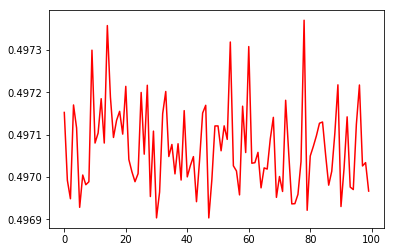

In [38]:
history = model.fit(
    x_train, y_train, epochs=epochs, batch_size=batch_size, 
    class_weight=class_weight, verbose=False)

train_acc = model.evaluate(x_train, y_train, batch_size=1)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=1)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## Buhh,糟透了

下面會討論為何Neural Network不比Logistic regression好


# 為何Neural Network不比Logistic regression好？

https://stats.stackexchange.com/questions/43538/difference-between-logistic-regression-and-neural-networks

https://www.quora.com/When-should-we-use-logistic-regression-and-Neural-Network

https://www.linkedin.com/pulse/logistic-regression-vs-deep-neural-networks-david-young

https://sebastianraschka.com/faq/docs/logisticregr-neuralnet.html